# Image_Proccess_Filter

### Load scripts

In [1]:
%matplotlib inline
from script.util import *
from script.load_data_gray import *

In [2]:
t0 = time.time()

run_name = get_run_name('SC_Iceberg_Classifier', 'Image_Proccess_Filter')
html_folder = get_html_folder(True)
input_folder = get_input_folder(True)
input_processed_folder = get_input_processed_folder(True)
log_folder = get_log_folder(True)
model_folder = get_model_folder(True)
output_folder = get_output_folder(True)

run_name: SC_Iceberg_Classifier-Image_Proccess_Filter-20180112_233025
D:\Kaggle\statoil-iceberg-classifier-challenge\html
D:\Kaggle\statoil-iceberg-classifier-challenge\input
D:\Kaggle\statoil-iceberg-classifier-challenge\input\processed
D:\Kaggle\statoil-iceberg-classifier-challenge\log
D:\Kaggle\statoil-iceberg-classifier-challenge\model
D:\Kaggle\statoil-iceberg-classifier-challenge\output


In [3]:
%%time
id_data, id_test = load_id()
y_data = load_y_data()

band1_data_gray, band2_data_gray, band1_test_gray, band2_test_gray = load_band_data_gray()
x_data_gray, x_test_gray = load_data_gray()
describe(band1_data_gray)
describe(band2_data_gray)
describe(band1_test_gray)
describe(band2_test_gray)

describe(x_data_gray)
describe(x_test_gray)

(1604,) 000d71b1 fffe76e4 12928
(8424,) 000c65d7 fff77564 67488
(1604,) 0 1 12928
(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128
(1604, 75, 75, 3) 0.0 1.0 216540144
(8424, 75, 75, 3) 0.0 1.0 1137240144
(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128
(1604, 75, 75, 3) 0.0 1.0 216540144
(8424, 75, 75, 3) 0.0 1.0 1137240144
Wall time: 5.92 s


### Filter: Edge

In [4]:
%%time
from skimage import data, filters

band1_data_gray_sobel = np.array([filters.sobel(x) for x in band1_data_gray])
band2_data_gray_sobel = np.array([filters.sobel(x) for x in band2_data_gray])
band1_test_gray_sobel = np.array([filters.sobel(x) for x in band1_test_gray])
band2_test_gray_sobel = np.array([filters.sobel(x) for x in band2_test_gray])

band1_data_gray_sobel_path = os.path.join(get_input_processed_folder(), 'band1_data_gray_sobel.npy')
band2_data_gray_sobel_path = os.path.join(get_input_processed_folder(), 'band2_data_gray_sobel.npy')
band1_test_gray_sobel_path = os.path.join(get_input_processed_folder(), 'band1_test_gray_sobel.npy')
band2_test_gray_sobel_path = os.path.join(get_input_processed_folder(), 'band2_test_gray_sobel.npy')

np.save(band1_data_gray_sobel_path, band1_data_gray_sobel)
np.save(band2_data_gray_sobel_path, band2_data_gray_sobel)
np.save(band1_test_gray_sobel_path, band1_test_gray_sobel)
np.save(band2_test_gray_sobel_path, band2_test_gray_sobel)

describe(band1_data_gray_sobel)
describe(band2_data_gray_sobel)
describe(band1_test_gray_sobel)
describe(band2_test_gray_sobel)

(1604, 75, 75) 0.0 0.568412374825 72180128
(1604, 75, 75) 0.0 0.609926435782 72180128
(8424, 75, 75) 0.0 0.607657213723 379080128
(8424, 75, 75) 0.0 0.60653524554 379080128
Wall time: 12.2 s


(6, 4)
(6, 4)


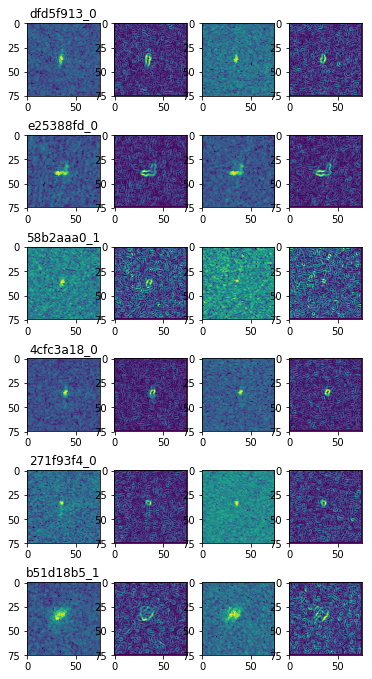

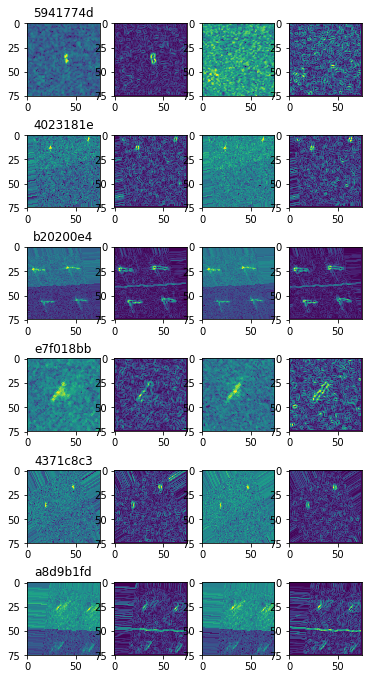

In [5]:
show_data_images(6, 3, id_data, y_data, band1_data_gray, band1_data_gray_sobel, band2_data_gray, band2_data_gray_sobel)
show_data_images(6, 3, id_test, None, band1_test_gray, band1_test_gray_sobel, band2_test_gray, band2_test_gray_sobel)

### Filter: Gabor

gabor滤波可用来进行边缘检测和纹理特征提取

In [6]:
%%time
from skimage import data, filters

band1_data_gray_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x in band1_data_gray])
band2_data_gray_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x in band2_data_gray])
band1_test_gray_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x in band1_test_gray])
band2_test_gray_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x in band2_test_gray])

band1_data_gray_gabor_path = os.path.join(get_input_processed_folder(), 'band1_data_gray_gabor.npy')
band2_data_gray_gabor_path = os.path.join(get_input_processed_folder(), 'band2_data_gray_gabor.npy')
band1_test_gray_gabor_path = os.path.join(get_input_processed_folder(), 'band1_test_gray_gabor.npy')
band2_test_gray_gabor_path = os.path.join(get_input_processed_folder(), 'band2_test_gray_gabor.npy')

np.save(band1_data_gray_gabor_path, band1_data_gray_gabor)
np.save(band2_data_gray_gabor_path, band2_data_gray_gabor)
np.save(band1_test_gray_gabor_path, band1_test_gray_gabor)
np.save(band2_test_gray_gabor_path, band2_test_gray_gabor)

describe(band1_data_gray_gabor)
describe(band2_data_gray_gabor)
describe(band1_test_gray_gabor)
describe(band2_test_gray_gabor)

(1604, 75, 75) -0.073896056501 0.0914335762219 72180128
(1604, 75, 75) -0.0691016245468 0.0946083246064 72180128
(8424, 75, 75) -0.0845217984336 0.120756902264 379080128
(8424, 75, 75) -0.0930851253701 0.0954826721627 379080128
Wall time: 19min 45s


(6, 4)
(6, 4)


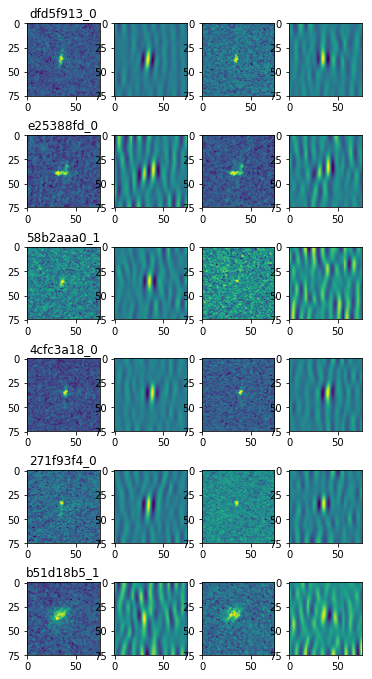

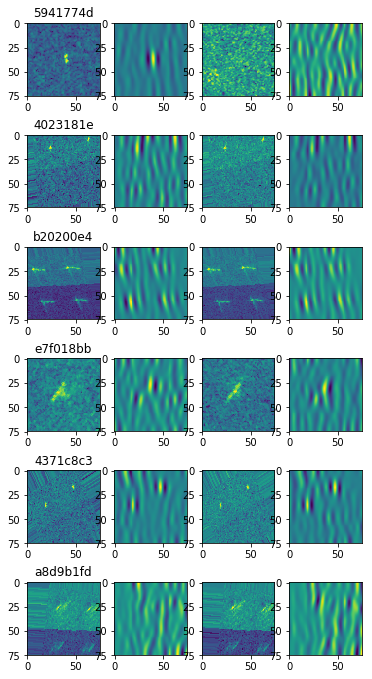

In [7]:
show_data_images(6, 3, id_data, y_data, band1_data_gray, band1_data_gray_gabor, band2_data_gray, band2_data_gray_gabor)
show_data_images(6, 3, id_test, None, band1_test_gray, band1_test_gray_gabor, band2_test_gray, band2_test_gray_gabor)

### Open Close

In [8]:
import cv2

threshhold = 0.9
band1_data_gray_bin = (band1_data_gray > threshhold).astype(np.uint8)*255
band2_data_gray_bin = (band2_data_gray > threshhold).astype(np.uint8)*255
band1_test_gray_bin = (band1_test_gray > threshhold).astype(np.uint8)*255
band2_test_gray_bin = (band2_test_gray > threshhold).astype(np.uint8)*255

band1_data_gray_open = cv2.morphologyEx(band1_data_gray_bin, cv2.MORPH_CLOSE, np.ones((1, 1)))
band2_data_gray_open = cv2.morphologyEx(band2_data_gray_bin, cv2.MORPH_CLOSE, np.ones((1, 1)))
band1_test_gray_open = cv2.morphologyEx(band1_test_gray_bin, cv2.MORPH_CLOSE, np.ones((1, 1)))
band2_test_gray_open = cv2.morphologyEx(band2_test_gray_bin, cv2.MORPH_CLOSE, np.ones((1, 1)))

band1_data_gray_close = cv2.morphologyEx(band1_data_gray_bin, cv2.MORPH_CLOSE, np.ones((10, 10)))
band2_data_gray_close = cv2.morphologyEx(band2_data_gray_bin, cv2.MORPH_CLOSE, np.ones((10, 10)))
band1_test_gray_close = cv2.morphologyEx(band1_test_gray_bin, cv2.MORPH_CLOSE, np.ones((10, 10)))
band2_test_gray_close = cv2.morphologyEx(band2_test_gray_bin, cv2.MORPH_CLOSE, np.ones((10, 10)))

(6, 6)
(6, 6)


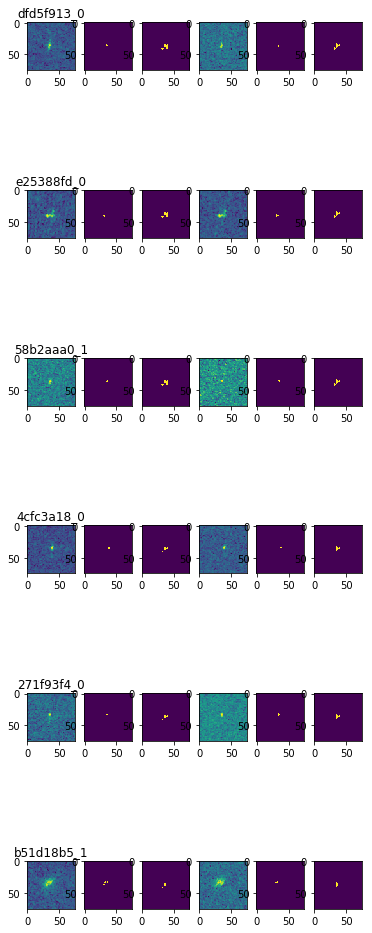

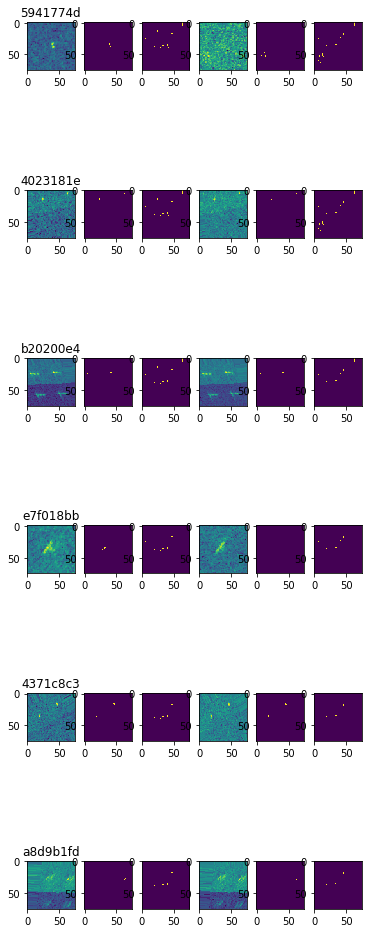

In [9]:
show_data_images(6, 3, id_data, y_data, band1_data_gray, band1_data_gray_open, band1_data_gray_close, band2_data_gray, band2_data_gray_open, band2_data_gray_close)
show_data_images(6, 3, id_test, None, band1_test_gray, band1_test_gray_open, band1_test_gray_close, band2_test_gray, band2_test_gray_open, band2_test_gray_close)

In [10]:
band1_data_gray_open_path = os.path.join(get_input_processed_folder(), 'band1_data_gray_open.npy')
band2_data_gray_open_path = os.path.join(get_input_processed_folder(), 'band2_data_gray_open.npy')
band1_test_gray_open_path = os.path.join(get_input_processed_folder(), 'band1_test_gray_open.npy')
band2_test_gray_open_path = os.path.join(get_input_processed_folder(), 'band2_test_gray_open.npy')

np.save(band1_data_gray_open_path, band1_data_gray_open)
np.save(band2_data_gray_open_path, band2_data_gray_open)
np.save(band1_test_gray_open_path, band1_test_gray_open)
np.save(band2_test_gray_open_path, band2_test_gray_open)

describe(band1_data_gray_open)
describe(band2_data_gray_open)
describe(band1_test_gray_open)
describe(band2_test_gray_open)

(1604, 75, 75) 0 255 9022628
(1604, 75, 75) 0 255 9022628
(8424, 75, 75) 0 255 47385128
(8424, 75, 75) 0 255 47385128


In [11]:
band1_data_gray_close_path = os.path.join(get_input_processed_folder(), 'band1_data_gray_close.npy')
band2_data_gray_close_path = os.path.join(get_input_processed_folder(), 'band2_data_gray_close.npy')
band1_test_gray_close_path = os.path.join(get_input_processed_folder(), 'band1_test_gray_close.npy')
band2_test_gray_close_path = os.path.join(get_input_processed_folder(), 'band2_test_gray_close.npy')

np.save(band1_data_gray_close_path, band1_data_gray_close)
np.save(band2_data_gray_close_path, band2_data_gray_close)
np.save(band1_test_gray_close_path, band1_test_gray_close)
np.save(band2_test_gray_close_path, band2_test_gray_close)

describe(band1_data_gray_close)
describe(band2_data_gray_close)
describe(band1_test_gray_close)
describe(band2_test_gray_close)

(1604, 75, 75) 0 255 9022628
(1604, 75, 75) 0 255 9022628
(8424, 75, 75) 0 255 47385128
(8424, 75, 75) 0 255 47385128


In [12]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

time cost: 1218.11 s
Done!


In [13]:
print(run_name)

SC_Iceberg_Classifier-Image_Proccess_Filter-20180112_233025
